In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./P1-简单的线性回归-工资预测/Income1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


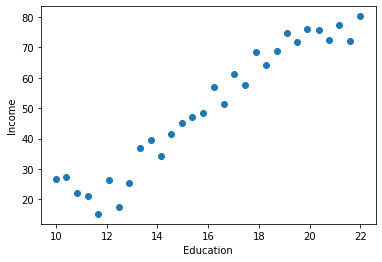

In [4]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

In [5]:
from torch import nn

In [6]:
X = torch.from_numpy(data.Education.values.reshape(-1, 1).astype(np.float32))

In [7]:
Y = torch.from_numpy(data.Income.values.reshape(-1, 1).astype(np.float32))

In [8]:
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
learing_rate = 0.0001

In [10]:
for epoch in range(5000):
    for x,y in zip(X,Y):
        y_pred = torch.matmul(x, w) + b
        loss = (y - y_pred).pow(2).mean()
        if not w.grad is None:
            w.grad.data.zero_()
        if not b.grad is None:
            b.grad.data.zero_()
        loss.backward()
        with torch.no_grad():
            w.data -= w.grad.data*learing_rate
            b.data -= b.grad.data*learing_rate

In [11]:
w

tensor([4.9755], requires_grad=True)

In [12]:
b

tensor([-28.3874], requires_grad=True)

In [16]:
opt = torch.optim.SGD(model.parameters(), lr= 0.0001)

In [18]:
for i in range(5000):
    for x, y in zip(X, Y):
        y_pred = model(x)
        loss = loss_fn(y, y_pred)
        opt.zero_grad()
        loss.backward()
        opt.step()

In [19]:
model.weight

Parameter containing:
tensor([[4.9674]], requires_grad=True)

In [20]:
model.bias

Parameter containing:
tensor([-28.2380], requires_grad=True)

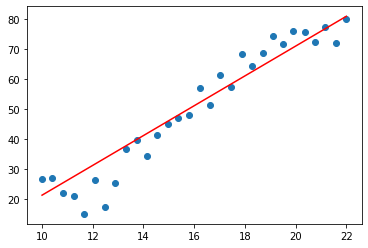

In [22]:
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), model(X).data.numpy(), c='r')